## NX-414: Brain-like computation and intelligence
Notebook prepared by Alessandro Marin Vargas

# Week 6 - Mini project (Predicting neural activity)

The objectives of the mini project are:
- Learn how to predict neural activity using linear regression from images and from neural network layers.
- Quantify the goodness of the model
- Compare the results across the network layers and between trained/random neural network
- Predict the neural activity using a neural network in a data-driven approach

Specifically, here you will use the data from the following [paper](https://www.jneurosci.org/content/jneuro/35/39/13402.full.pdf). The behavioral experiment consisted in showing to non-human primates some images while recording the neural activity with multielectrode arrays from the inferior temporal (IT) cortex. In the data we provided you, the neural activity and the images are already pre-processed and you will have available the images and the corresponding average firing rate (between 70 and 170 ms) per each neuron.

### Deadline for Mini-Project Submission: May 7, 2025

You are required to submit your mini-projects by midnight on 07/05/25. Please upload a .zip file to Moodle containing your code, along with the following specific components:

- One-Page Report (Report.pdf): This should detail your investigative process and include:
    - A comparison table of models. This should cover linear regression from stimuli, both trained and random task-driven models, data-driven models, and your best-performing model.
    - A figure illustrating the variation in neural prediction across different layers of a task-driven model.
    - Your exploration to develop the most effective model at predicting IT neural activity
- Example Script/Notebook: Please provide a script (test.py) or a notebook (test.ipynb) demonstrating how your best model performs on the validation set. This should serve as an example of the model's usage.

In [3]:
#import sys
#!{sys.executable} -m pip install gdown h5py

In [ ]:

from utils import load_it_data, visualize_img
import matplotlib.pyplot as plt
import numpy as np
import gdown

url = "https://drive.google.com/file/d/1s6caFNRpyR9m7ZM6XEv_e8mcXT3_PnHS/view?usp=share_link"
output = "IT_data.h5"
gdown.download(url, output, quiet=False, fuzzy=True)


'\nurl = "https://drive.google.com/file/d/1s6caFNRpyR9m7ZM6XEv_e8mcXT3_PnHS/view?usp=share_link"\noutput = "IT_data.h5"\ngdown.download(url, output, quiet=False, fuzzy=True)'

### Load the data

In [5]:
path_to_data = '' ## Insert the folder where the data is, if you download in the same folder as this notebook then leave it blank

stimulus_train, stimulus_val, stimulus_test, objects_train, objects_val, objects_test, spikes_train, spikes_val = load_it_data(path_to_data)


In [6]:
n_stimulus, n_channels, img_size, _ = stimulus_train.shape
_, n_neurons = spikes_train.shape
print('The train dataset contains {} stimuli and {} IT neurons'.format(n_stimulus,n_neurons))
print('Each stimulus have {} channgels (RGB)'.format(n_channels))
print('The size of the image is {}x{}'.format(img_size,img_size))

The train dataset contains 2592 stimuli and 168 IT neurons
Each stimulus have 3 channgels (RGB)
The size of the image is 224x224


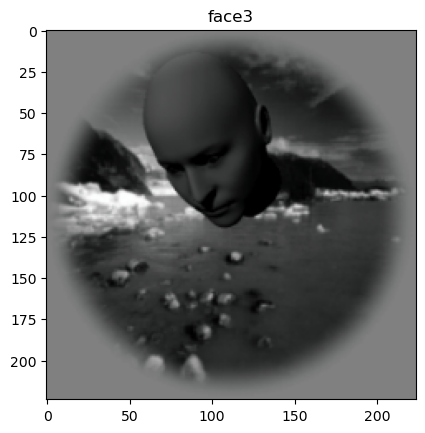

In [7]:
stim_idx = 2

visualize_img(stimulus_train,objects_train,stim_idx)

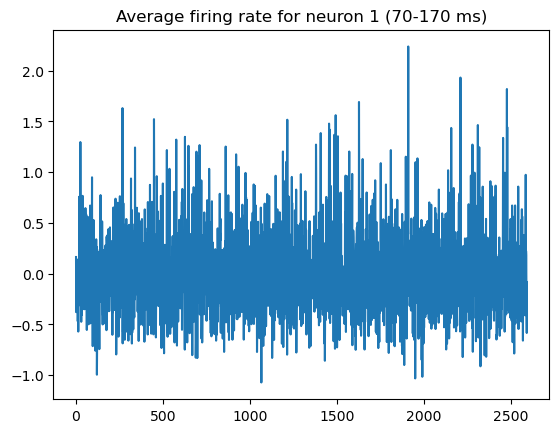

In [8]:
neuron_idx = 1

plt.figure()
plt.title('Average firing rate for neuron {} (70-170 ms)'.format(neuron_idx))
plt.plot(spikes_train[:,neuron_idx])

## Part 1: Predict the neural activity from pixels

##### Develop a linear regression model that predict the neural activity from pixels.
You can try out different types of linear regression (ridge, least-square regression)

In [9]:
#### Here your code

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Reshape the stimulus: (n_samples, n_channels, img_size, img_size) -> (n_samples, n_features)
n_samples = stimulus_train.shape[0]
X_train = stimulus_train.reshape(n_samples, -1) # flattened RGB dimensions + pixels
X_val = stimulus_val.reshape(stimulus_val.shape[0], -1)

# Target: spike activity
y_train = spikes_train
y_val = spikes_val

In [35]:
### Ordinary Least Squares Regression

ols = LinearRegression()
ols.fit(X_train, y_train)

# Predictions
y_pred_ols = ols.predict(X_val)

# Evaluate
mse_ols = mean_squared_error(y_val, y_pred_ols)
r2_ols = r2_score(y_val, y_pred_ols)

print("OLS Regression:")
print("MSE:", mse_ols)
print("R2 score:", r2_ols)

OLS Regression:
MSE: 0.2856713
R2 score: -1.1712338892742222


In [ ]:
### Using Ridge Regression (with regularization)

# Tune alpha? small (0.01) = model fits closely, may overfit noisy neurons, large (100) = model becomes simple, may underfit
ridge = Ridge(alpha=1)  
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_val)

# Evaluate
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)

print("\nRidge Regression:")
print("MSE:", mse_ridge)
print("R2 score:", r2_ridge)

c:\Users\babou\EPFL\Software\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:241: LinAlgWarning: Ill-conditioned matrix (rcond=5.8669e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)



Ridge Regression:
MSE: 0.28518558
R2 score: -1.1671146705428168


In [13]:
'''### Using Lasso Regression (takes too long to run)

lasso = Lasso(alpha=0.01, max_iter=1000, warm_start=True, selection='random') # max_iter=10000 before
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_val)

# Evaluate
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

print("OLS Regression:")
print("MSE:", mse_lasso)
print("R2 score:", r2_lasso)'''

'### Using Lasso Regression (takes too long to run)\n\nlasso = Lasso(alpha=0.01, max_iter=1000, warm_start=True, selection=\'random\') # max_iter=10000 before\nlasso.fit(X_train, y_train)\n\n# Predictions\ny_pred_lasso = lasso.predict(X_val)\n\n# Evaluate\nmse_lasso = mean_squared_error(y_val, y_pred_lasso)\nr2_lasso = r2_score(y_val, y_pred_lasso)\n\nprint("OLS Regression:")\nprint("MSE:", mse_lasso)\nprint("R2 score:", r2_lasso)'

In [14]:
'''### Using ElasticNet Regression (takes too long to run)

en = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=1000, solver='saga') # max_iter=10000 before
en.fit(X_train, y_train)

# Predictions
y_pred_en = en.predict(X_val)

# Evaluate
mse_en = mean_squared_error(y_val, y_pred_en)
r2_en = r2_score(y_val, y_pred_en)

print("OLS Regression:")
print("MSE:", mse_en)
print("R2 score:", r2_en)'''

'### Using ElasticNet Regression (takes too long to run)\n\nen = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=1000, solver=\'saga\') # max_iter=10000 before\nen.fit(X_train, y_train)\n\n# Predictions\ny_pred_en = en.predict(X_val)\n\n# Evaluate\nmse_en = mean_squared_error(y_val, y_pred_en)\nr2_en = r2_score(y_val, y_pred_en)\n\nprint("OLS Regression:")\nprint("MSE:", mse_en)\nprint("R2 score:", r2_en)'

##### Evaluate your prediction (Check both the correlation and explained variance for each neuron). Plot the distribution for the explained variance across neurons.

In [ ]:
#### Here your code

from scipy.stats import pearsonr


def evaluate_predictions(y_val, y_pred, model_name="Model"):
    """
    Evaluate neural prediction performance.

    Parameters:
    - y_val: true spike responses (samples x neurons)
    - y_pred: predicted spike responses (samples x neurons)
    - model_name: label for plots and printouts

    Returns:
    - correlations: array of Pearson correlation coefficients (per neuron)
    - explained_var: array of explained variance scores (per neuron)
    """
    n_neurons = y_val.shape[1]
    correlations = np.zeros(n_neurons)
    explained_var = np.zeros(n_neurons)

    for i in range(n_neurons):
        true_vals = y_val[:, i]
        pred_vals = y_pred[:, i]

        # Pearson correlation
        if np.std(true_vals) > 0:
            corr, _ = pearsonr(true_vals, pred_vals)
        else:
            corr = 0.0
        correlations[i] = corr

        # Explained variance
        explained_var[i] = r2_score(true_vals, pred_vals)

    # Print summary
    print(f"--- {model_name} Evaluation ---")
    print("Average correlation:", np.mean(correlations))
    print("Average explained variance:", np.mean(explained_var))

    # Plot distributions
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    axs[0].hist(explained_var, bins=30, color='skyblue', edgecolor='black')
    axs[0].set_title(f'{model_name}: Explained Variance')
    axs[0].set_xlabel('Explained Variance')
    axs[0].set_ylabel('Number of Neurons')
    axs[0].grid(True)

    axs[1].hist(correlations, bins=30, color='salmon', edgecolor='black')
    axs[1].set_title(f'{model_name}: Correlation (Pearson r)')
    axs[1].set_xlabel('Correlation')
    axs[1].set_ylabel('Number of Neurons')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

    return correlations, explained_var

--- OLS Evaluation ---
Average correlation: 0.1465349770405214
Average explained variance: -1.1712338906177675


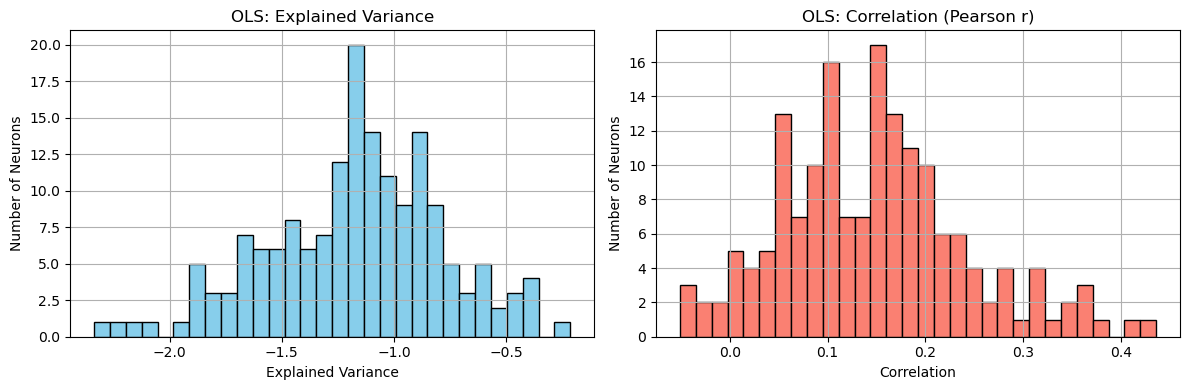

--- Ridge Evaluation ---
Average correlation: 0.1466810456705079
Average explained variance: -1.1671146718831533


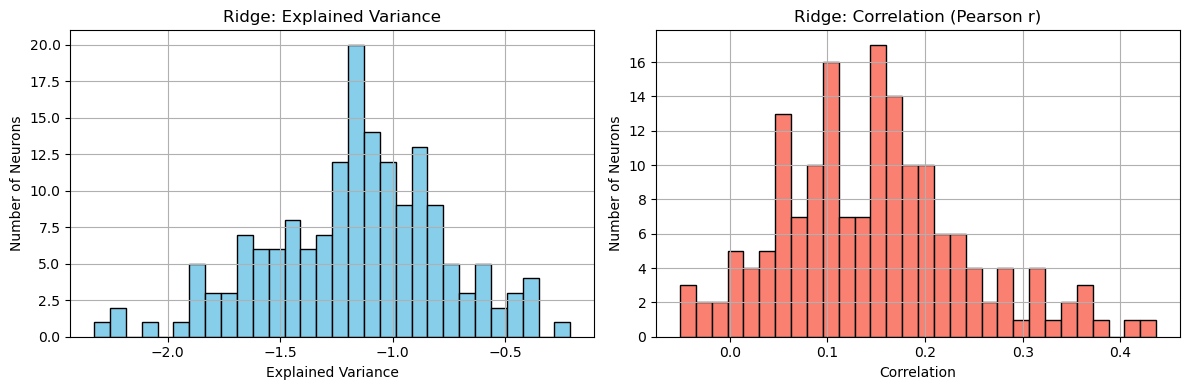

In [43]:
cor_ols, ev_ols = evaluate_predictions(y_val, y_pred_ols, model_name="OLS")
cor_ridge, ev_ridge = evaluate_predictions(y_val, y_pred_ridge, model_name="Ridge")

##### Predicting from pixels is very hard and the model is likely to overfit. An image is very high-dimensional, try to retain the corresponding 1000 PCs and use them to predict the neural activity. 

In [44]:
#### Here your code

from sklearn.decomposition import PCA

# Apply PCA to reduce to 1000 components
pca = PCA(n_components=1000)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

print("Original dimensionality:", X_train.shape[1])
print("Reduced dimensionality:", X_train_pca.shape[1])

Original dimensionality: 150528
Reduced dimensionality: 1000


In [45]:
ols.fit(X_train_pca, y_train)
y_pred_ols_pca = ols.predict(X_val_pca)

In [46]:
ridge.fit(X_train_pca, y_train)
y_pred_ridge_pca = ridge.predict(X_val_pca)

--- OLS (PCA-1000) Evaluation ---
Average correlation: 0.21750395040526416
Average explained variance: -0.08643478964705406


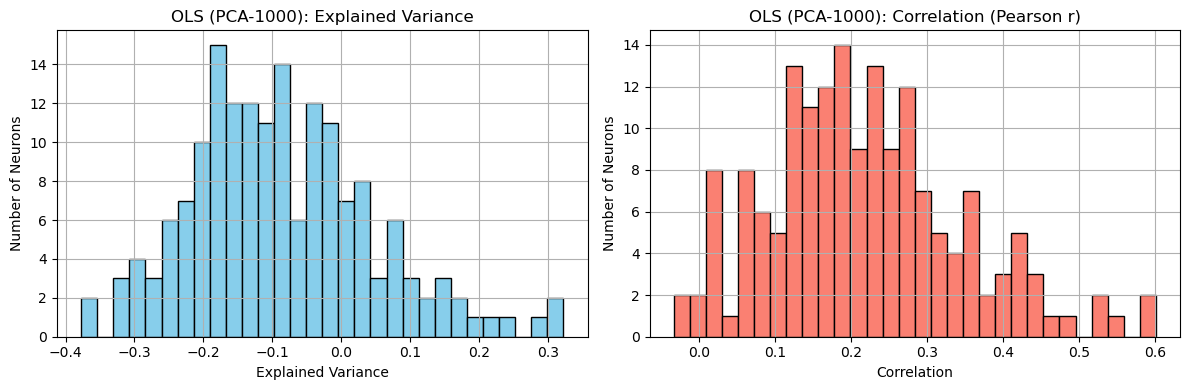

--- Ridge (PCA-1000) Evaluation ---
Average correlation: 0.21750739438914174
Average explained variance: -0.08641584700465682


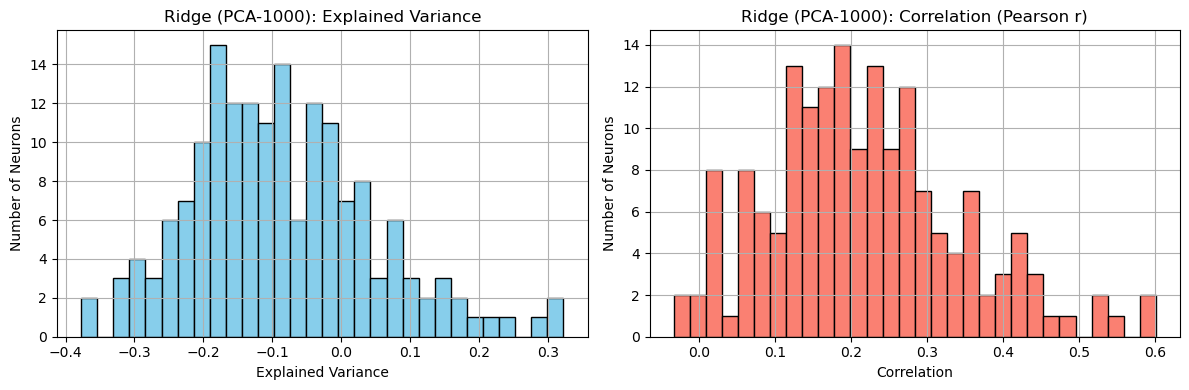

In [47]:
cor_ols_pca, ev_ols_pca = evaluate_predictions(y_val, y_pred_ols_pca, model_name="OLS (PCA-1000)")
cor_ridge_pca, ev_ridge_pca = evaluate_predictions(y_val, y_pred_ridge_pca, model_name="Ridge (PCA-1000)")

##### Can we improve the prediction? Using the ridge regression, find the best parameter with cross-fold validation (remember to split the data keeping the same distribution of classes between the train and validation set). Does it get better?

Best alpha selected by RidgeCV: 10000.0
--- Optimized RidgeCV (alpha=10000.0) Evaluation ---
Average correlation: 0.2054188944379223
Average explained variance: -0.05973387608975982


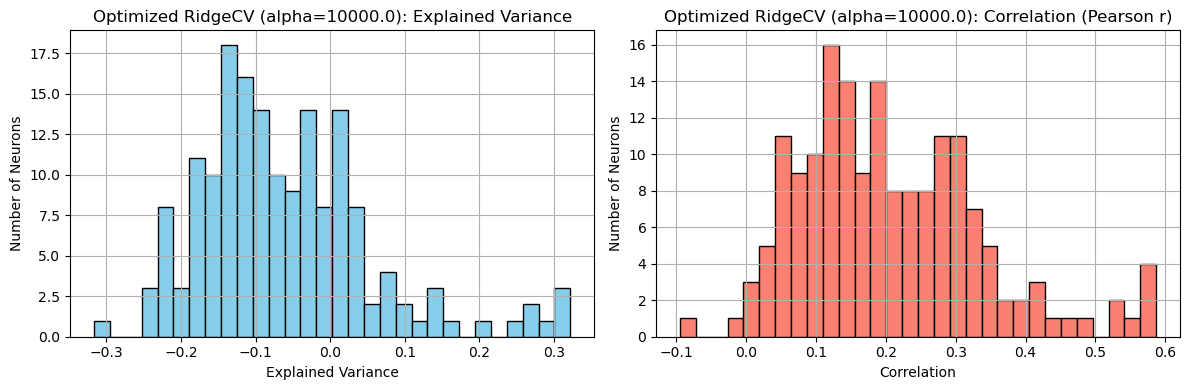

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Flatten images into 2D feature array
X = stimulus_train.reshape(stimulus_train.shape[0], -1)
y = spikes_train
labels = objects_train  # For stratification

# Step 2: Stratified train/val split to preserve class balance
X_train, X_val, y_train, y_val, labels_train, labels_val = train_test_split(X, y, labels, test_size=0.2, random_state=42, stratify=labels)

# Step 3: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 4: Apply PCA (fit only once)
pca = PCA(n_components=1000)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Step 5: Define alphas to test and use RidgeCV for efficient tuning
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=5) # scoring method is r2 as in our function evaluate_predictions()
# RidgeCV doesn't expose CV scores directly, so we would need to recompute them if needed

# Step 6: Fit the model on PCA-reduced data
ridge_cv.fit(X_train_pca, y_train)
best_alpha = ridge_cv.alpha_
print(f"Best alpha selected by RidgeCV: {best_alpha}")

# Step 7: Predict and evaluate
y_pred = ridge_cv.predict(X_val_pca)
_, _ = evaluate_predictions(y_val, y_pred, model_name=f"Optimized RidgeCV (alpha={best_alpha})")


### Part 2: Predict the neural activity with the task-driven modeling approach

As you have seen in the class, the underlying hypothesis of task-driven modeling is that training the network to perform a relevant behavioral task makes the network to develop representations that resemble the ones of the biological brain. Let's test this hypothesis by loading a pre-trained ResNet50 model and use the activations of each layer to predict the neural activity. Follow these steps:

- Give as input to the network the stimuli and extract the corresponding activations of the following layers ['conv1','layer1','layer2','layer3','layer4','avgpool']
- Compute the 1000 PCs for each layer activation. (Careful that you don't want to store all activations together at the same time because it won't fit in the memory. Therefore, compute the activations and corresponding PCs for each layer and store only the computed PCs).
- Use the PCs of each layer to predict the neural activity using the linear regression models you developed before.
- Compute the goodness of fit using the correlation and explained variance metrics. Do you predict the neural activity better than before?
- Plot the distribution of explained variance with respect to the layer of the network (order them based on the depth). How does the neural activity changes across the model layers, can you make some statements about it?
- Compare the predictions that you obtained using one layer of the pretrained model and the one obtained using the same layer but from a randomly initialized model. Which network can better predict the neural activity and why?

In [19]:
#### Here your code